#Proceso del EDA-Análisis exploratorio de Datos

#1. Carga y examen inicial: Importar y obtener una primera visión del conjunto de datos
#2. Revisión Estructural: Analizar dimensiones, filas, columnas y tipos de variables
#3. Identificación de ausencias: Detectar y cuantificar valores nulos o registros duplicados.
#4. Análisis univariado: Estudiar cada variable de forma individual. Distribuciones, estadísticas.
#5. Análisis multivariado: Explorar relaciones y correlaciones entre dos o más variables.
#6. Detección de Anomalías: Identificar valores atípicos outliers y posibles errores de datos.
#7. Resumen y Preperación: Extraer hallazgos clave y documentar las necesidades de limpieza.

##Importación de Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar los **datos**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###Funciones Principales

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.head(10)
#Imprime los 10 primeros

df.tail(10)
#Imprime los 10 ultimos

df.sample(10)
#imprime 10 datos aleatorios

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
303,304,1,2,"Keane, Miss Nora A",female,NaN,0,0,226593,12.3500,E101,Q
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
269,270,1,1,"Bissette, Miss Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df ["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Función para saber cuantos datos nulos hay
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#para tomar decisiones el % de Nulos

pct_nulos = df.isnull().mean()*100
pct_nulos

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


##Análisis Univariado
######Ver a través de una variable como se comporta

####EDAD

In [ ]:
df["Age"].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


<Axes: xlabel='Age', ylabel='Count'>

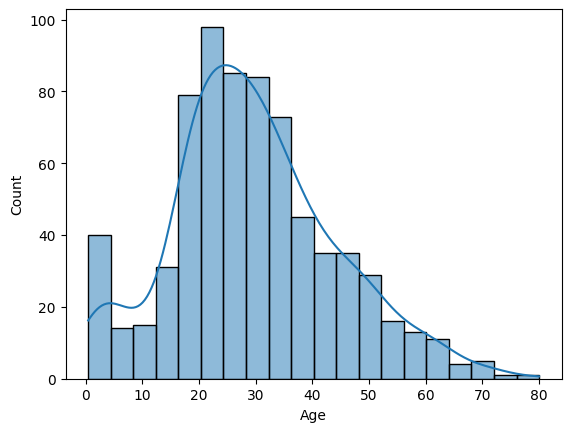

In [ ]:
#Gráficas

sns.histplot(df["Age"], kde=True)

<Axes: ylabel='Age'>

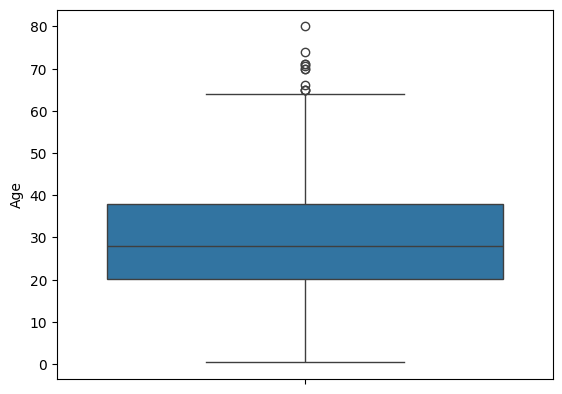

In [ ]:
#Gráfica de Valores Outliers, Valores atipicos- Gráfica de caja

sns.boxplot(df["Age"])



<Axes: xlabel='Age'>

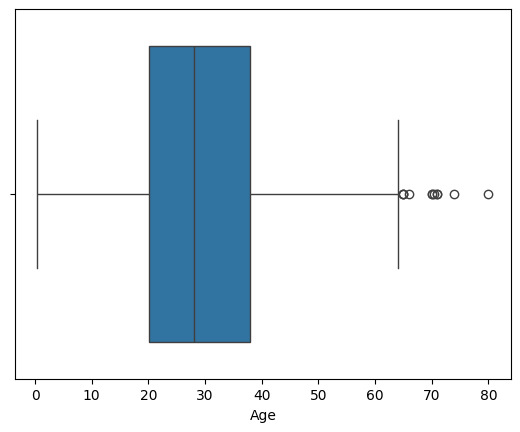

In [ ]:
#Visualizacion de Outliers en el eje X

sns.boxplot(x=df["Age"])

###Género

<Axes: xlabel='Sex'>

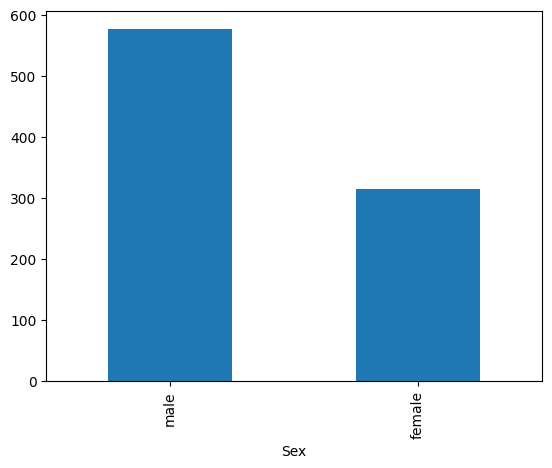

In [ ]:
df["Sex"].value_counts().plot(kind="bar")

<Axes: xlabel='Pclass'>

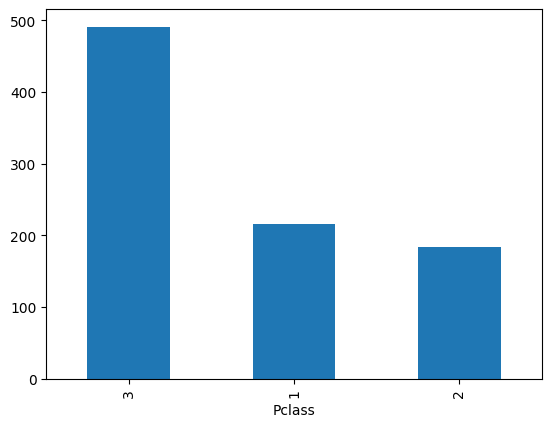

In [ ]:
df["Pclass"].value_counts().plot(kind="bar")

<Axes: xlabel='Survived'>

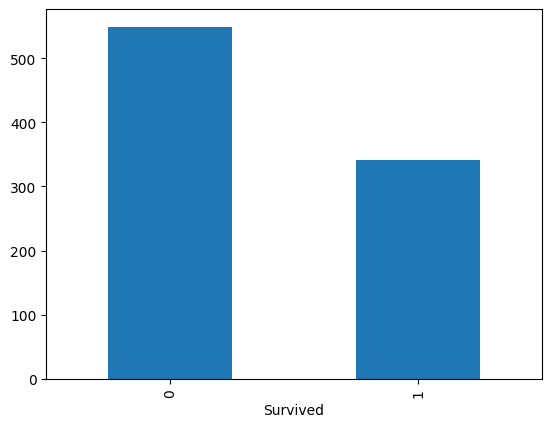

In [ ]:
df["Survived"].value_counts().plot(kind="bar")

###Análisis Bivariado. Cómo se relaciones 2 variables entre si

<Axes: xlabel='Sex', ylabel='count'>

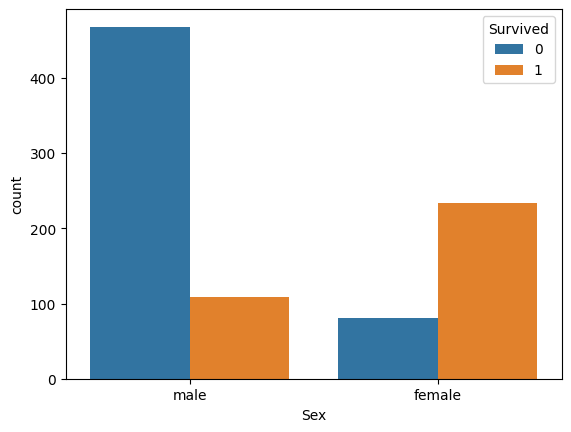

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

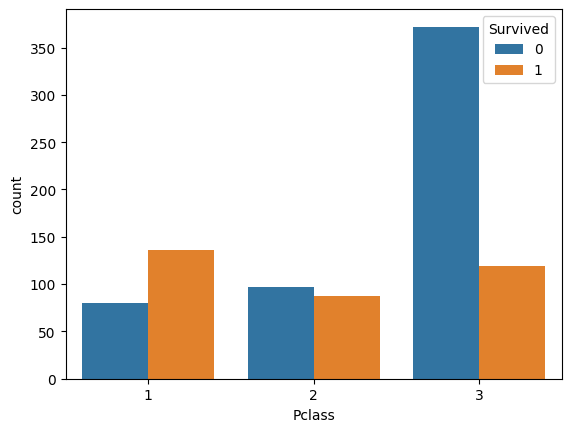

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df)

<Axes: xlabel='Age', ylabel='Count'>

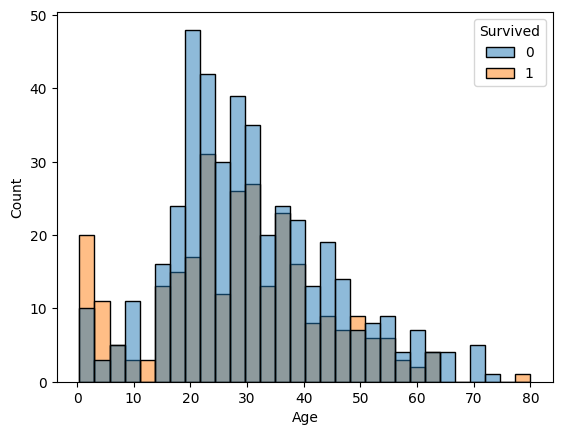

In [ ]:
sns.histplot(x="Age", hue="Survived", data=df, bins=30)

## Análisis Multivariado

<Axes: xlabel='Age', ylabel='Pclass'>

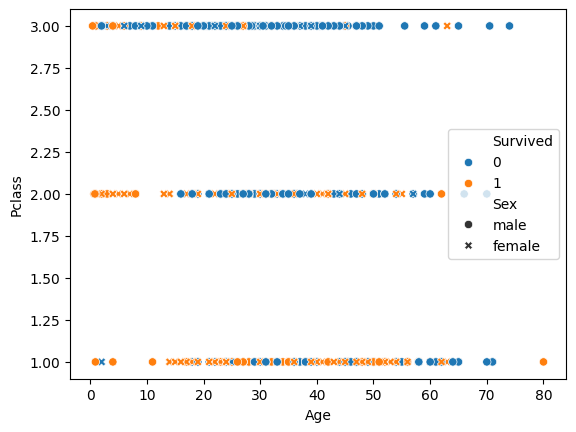

In [ ]:
sns.scatterplot(x="Age", y="Pclass", hue="Survived", style="Sex", data=df)

###Tablas Cruzadas

In [ ]:
pd.crosstab(df["Sex"], df["Survived"],normalize="index")*100

#de todxs hombres o mujeres ¿Cuántos murieron? ¿Cuántos sobrevivieros?

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [ ]:
pd.crosstab(df["Sex"], df["Survived"], normalize="columns")*100

#de todxs los que sobrevivieron ¿Cuántos eran hombres? ¿Cuántos eran mujeres?

Survived,0,1
Sex,,
female,14.754098,68.128655
male,85.245902,31.871345


In [ ]:
pd.crosstab([df["Sex"], df["Pclass"]], df["Survived"], normalize= "index")*100

Survived               0          1
Sex    Pclass                      
female 1        3.191489  96.808511
       2        7.894737  92.105263
       3       50.000000  50.000000
male   1       63.114754  36.885246
       2       84.259259  15.740741
       3       86.455331  13.544669

In [ ]:
bins= [0,12,16,30,50,80]
labels = ["Niño", "Adolescente", "Joven", "Adulto", "Anciano"]
df["RangoEdad"] = pd.cut(df["Age"], bins=bins, labels=labels)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RangoEdad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Joven
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Joven
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Anciano
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Niño
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Joven
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Adolescente


In [ ]:
pd.crosstab([df["Sex"], df["Pclass"], df["RangoEdad"]], df["Survived"], normalize="index")*100

Survived                            0           1
Sex    Pclass RangoEdad                          
female 1      Niño         100.000000    0.000000
              Adolescente    0.000000  100.000000
              Joven          3.448276   96.551724
              Adulto         2.702703   97.297297
              Anciano        0.000000  100.000000
       2      Niño           0.000000  100.000000
              Adolescente    0.000000  100.000000
              Joven          8.823529   91.176471
              Adulto         7.407407   92.592593
              Anciano       33.333333   66.666667
       3      Niño          52.173913   47.826087
              Adolescente   30.000000   70.000000
              Joven         52.173913   47.826087
              Adulto        72.727273   27.272727
              Anciano        0.000000  100.000000
male   1      Niño           0.000000  100.000000
              Joven         56.521739   43.478261
              Adulto        55.102041   44.897959
              Anciano       80.769231   19.230769
       2      Niño           0.000000  100.000000
              Adolescente  100.000000    0.000000
              Joven         97.560976    2.439024
              Adulto        88.571429   11.428571
              Anciano       91.666667    8.333333
       3      Niño          64.000000   36.000000
              Adolescente   91.666667    8.333333
              Joven         86.029412   13.970588
              Adulto        87.323944   12.676056
              Anciano      100.000000    0.000000

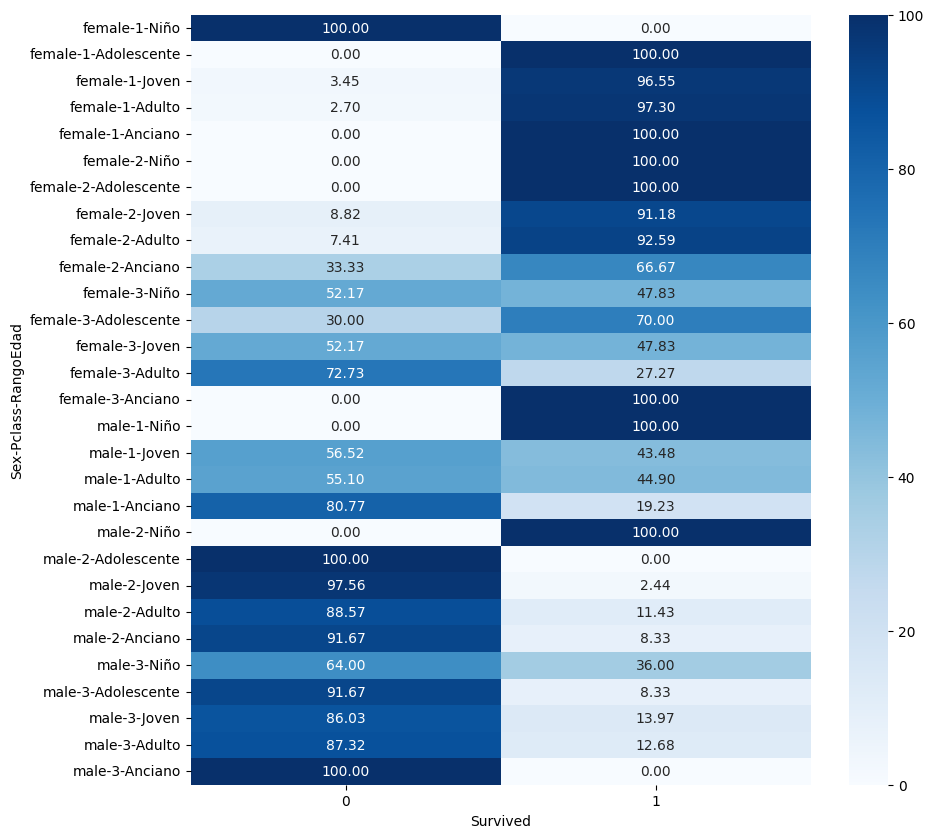

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab([df["Sex"], df["Pclass"], df["RangoEdad"]], df["Survived"], normalize="index")*100, annot=True, fmt="0.2f", cmap= "Blues")
plt.show()

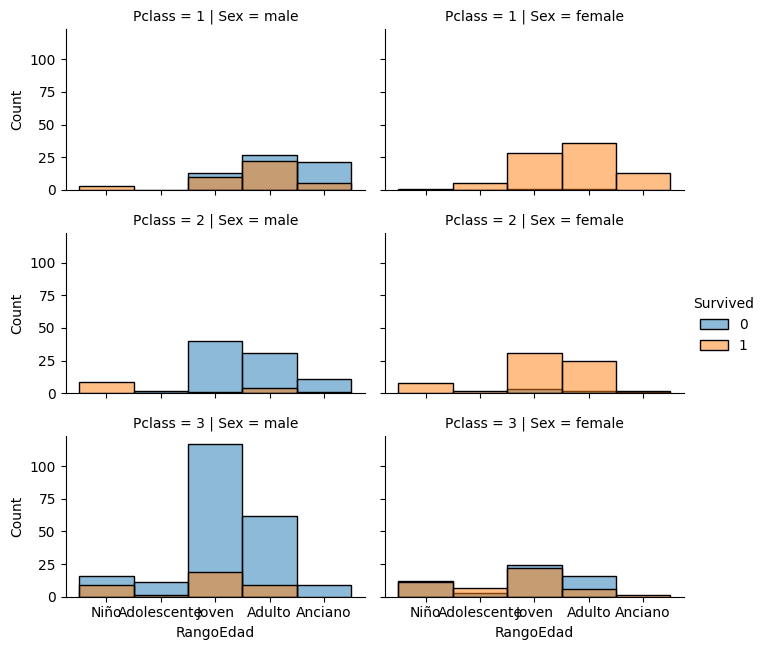

In [ ]:
g = sns.FacetGrid(df, col="Sex", row="Pclass", hue="Survived",  height=2.2, aspect=1.6)
g.map_dataframe(sns.histplot, x="RangoEdad", alpha=.5, bins=20)
g.add_legend();

#Limpieza de Datos

##Buscar duplicados

In [ ]:
df.duplicated().sum()

#Indica que no hay datos duplicados

np.int64(0)

In [ ]:
duplicados = df[df.duplicated()]
duplicados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RangoEdad


##Buscar datos faltantes

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
